# **Factorization Machines**  
[Paper Review](https://ddoeunn.github.io/2020/11/01/PAPER-REVIEW-Factorization-Machines.html)
### **Data**

$$
\mathbf{X} = \begin{pmatrix}
\mathbf{x}_1^T \\
\vdots \\
\mathbf{x}_n^T \\
\end{pmatrix} \in \mathbb{R}^{n \times p}
\quad \mathbf{x}_i = \begin{pmatrix}
x_{i1} \\
\vdots \\
x_{ip}
\end{pmatrix} \in \mathbb{R}^p
\quad \mathbf{y} = \begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix} \in \mathbb{R}^n
$$


---
### **Model**

$$
\hat{y}(\mathbf{x}) := w_0 + \underset{i=1}{\sum^p}w_ix_{i} + 
\underset{i=1}{\sum^p}\underset{j=i+1}{\sum^n} \left \langle \mathbf{v}_i, \mathbf{v}_j \right\rangle x_i x_j
$$


$$
\text{where } \mathbf{w} = \begin{pmatrix}
w_1 \\
\vdots \\
w_p
\end{pmatrix} \in \mathbb{R}^p
\quad \mathbf{V} = \begin{pmatrix}
\mathbf{v}_1^T \\
\vdots \\
\mathbf{v}_p^T \\
\end{pmatrix} \in \mathbb{R}^{p \times k}
\quad \mathbf{v}_i = \begin{pmatrix}
v_{i1}\\
\vdots \\
v_{ik}
\end{pmatrix} \in \mathbb{R}^k\\
\quad k \in \mathbb{N}_0^+ \text{ ;dimensionality of factorization}
$$


---
### **Linear term**

$$
\mathbf{X}\mathbf{w} =  \begin{pmatrix}
\mathbf{x}_1^T \\
\vdots \\
\mathbf{x}_n^T \\
\end{pmatrix}\begin{pmatrix}
w_1 \\
\vdots \\
w_p
\end{pmatrix}
= \begin{pmatrix}
\mathbf{x}_1^T w \\
\vdots \\
\mathbf{x}_n^T w \\
\end{pmatrix}
$$


---
### **Interaction term** 

$$
\underset{i=1}{\sum^p}\underset{j=i+1}{\sum^n} \left \langle \mathbf{v}_i, \mathbf{v}_j \right\rangle x_i x_j
 = \frac{1}{2}\underset{f=1}{\sum^k} \left( \left( \underset{i=1}{\sum^p}v_{i, f}x_i \right)^2  - \underset{i=1}{\sum^p} 
 v_{i, f}^2 x_i^2 \right)
$$

#### Example ($n=3, p=2, k=2$)
* First term

$$
\mathbf{XV} = \begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
x_{31} & x_{32} \\
\end{pmatrix}
\begin{pmatrix}
v_{11} & v_{12} \\
v_{21} & v_{22} \\
\end{pmatrix} = \left[a_{ij} \right]\\
\Rightarrow \text{first term} = \begin{pmatrix}
a_{11}^2 + a_{12}^2 \\
a_{21}^2 + a_{22}^2 \\
a_{31}^2 + a_{32}^2 \\
\end{pmatrix}
$$

* Second term

$$
\begin{pmatrix}
x_{11}^2 & x_{12}^2 \\
x_{21}^2 & x_{22}^2 \\
x_{31}^2 & x_{32}^2 \\
\end{pmatrix}
\begin{pmatrix}
v_{11}^2 & v_{12}^2 \\
v_{21}^2 & v_{22}^2 \\
\end{pmatrix} = \left[b_{ij} \right]\\
\Rightarrow \text{second term} = \begin{pmatrix}
b_{11} + b_{12} \\
b_{21} + b_{22} \\
b_{31} + b_{32} \\
\end{pmatrix}
$$

* Interaction term  

$$
\frac{1}{2}(\text{first term} - \text{second term})
$$

---
# **Implementation**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.3.0


## **1. Example Data**  
example data from Fig.1. in [Rendle, Steffen. “Factorization machines.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5694074&casa_token=qe7PhGTmui8AAAAA:hqUtCHz4l-dQHimFwaLSARSc3O3sEVvzavl6sUtsa0fEqQAP0l_R_HsEWxvhPiLGHNXJkxdjURc&tag=1)

In [ ]:
# X data
X = np.array([
#    Users  |     Movies     |    Movie Ratings   | Time | Last Movies Rated
#   A  B  C | TI  NH  SW  ST | TI   NH   SW   ST  |      | TI  NH  SW  ST
    [1, 0, 0,  1,  0,  0,  0,   0.3, 0.3, 0.3, 0,     13,   0,  0,  0,  0 ],
    [1, 0, 0,  0,  1,  0,  0,   0.3, 0.3, 0.3, 0,     14,   1,  0,  0,  0 ],
    [1, 0, 0,  0,  0,  1,  0,   0.3, 0.3, 0.3, 0,     16,   0,  1,  0,  0 ],
    [0, 1, 0,  0,  0,  1,  0,   0,   0,   0.5, 0.5,   5,    0,  0,  0,  0 ],
    [0, 1, 0,  0,  0,  0,  1,   0,   0,   0.5, 0.5,   8,    0,  0,  1,  0 ],
    [0, 0, 1,  1,  0,  0,  0,   0.5, 0,   0.5, 0,     9,    0,  0,  0,  0 ],
    [0, 0, 1,  0,  0,  1,  0,   0.5, 0,   0.5, 0,     12,   1,  0,  0,  0 ]
], dtype=np.float32)

# ratings
y = np.array([5, 3, 1, 4, 5, 1, 5], dtype=np.float32)
y = np.expand_dims(y, axis=1)
print('shape of X = {}, y = {}'.format(X.shape, y.shape))

n, p = X.shape
print('n= {}, p= {}'.format(n, p))

shape of X = (7, 16), y = (7, 1)
n= 7, p= 16


## **2. Hyper Parameters**

In [ ]:
K = 5 # the number of latent factors

# L2 regularized sum of squares loss function over W and V
lambda_w = tf.constant(0.001, name='lambda_w') 
lambda_v = tf.constant(0.001, name='lambda_v')

## **3. Model Parameters**

In [ ]:
# initialize parameters
w_0 = tf.Variable([0.])
w = tf.Variable(tf.zeros([p, 1]))
V = tf.Variable(tf.random.normal(shape=(p, K)))
print(w_0.shape, w.shape, V.shape)

(1,) (16, 1) (16, 5)


## **4. Training**

In [ ]:
lr = 0.1
epoch = 500
optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)

# Train
loss_values = []
for i in range(epoch):
    with tf.GradientTape() as tape:
        linear_terms = tf.matmul(X, w)
        inter_terms = 0.5 * tf.reduce_sum(tf.square(tf.matmul(X, V)) - \
                            tf.matmul(tf.square(X), tf.square(V)), 
                            axis=1, keepdims=True)
        y_hat = tf.add(w_0, linear_terms, inter_terms)
        error = tf.reduce_mean(tf.square(y - y_hat))
        l2_norm = tf.reduce_sum(tf.add(tf.multiply(lambda_w, tf.pow(w, 2)),
                                       tf.multiply(lambda_v, tf.pow(V, 2))))
        loss = tf.add(error, l2_norm)
        loss_values.append(loss)
    # get gradients
    grad = tape.gradient(loss, [w_0, w, V])
    # update
    optimizer.apply_gradients(zip(grad, [w_0, w, V]))

    if (i == 0) | ((i+1) % 50 == 0):
        print('step= {}, error= {:.5f}, loss= {:.5f}'.format(i+1, error, loss))


step= 1, error= 14.57143, loss= 14.66025
step= 50, error= 1.59111, loss= 1.69639
step= 100, error= 1.17546, loss= 1.29018
step= 150, error= 0.93732, loss= 1.06016
step= 200, error= 0.76963, loss= 0.90064
step= 250, error= 0.64378, loss= 0.78296
step= 300, error= 0.54577, loss= 0.69292
step= 350, error= 0.46750, loss= 0.62233
step= 400, error= 0.40387, loss= 0.56600
step= 450, error= 0.35145, loss= 0.52048
step= 500, error= 0.30784, loss= 0.48333


## **5. Result**

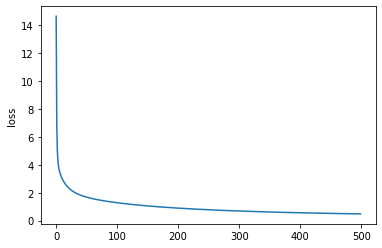

In [ ]:
plt.plot(loss_values)
plt.ylabel('loss')
plt.show()

# **Reference**
* [Rendle, Steffen. “Factorization machines.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5694074&casa_token=qe7PhGTmui8AAAAA:hqUtCHz4l-dQHimFwaLSARSc3O3sEVvzavl6sUtsa0fEqQAP0l_R_HsEWxvhPiLGHNXJkxdjURc&tag=1)
* https://nowave.it/factorization-machines-with-tensorflow.html